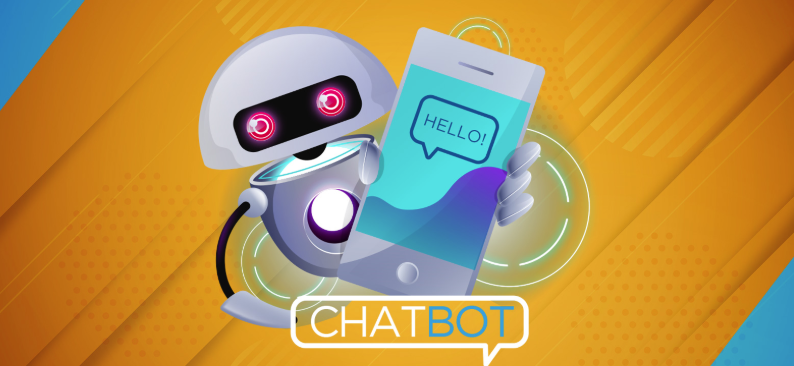

In [2]:
#Code to display the Image
#Image is currently in the local drive
#With in Github, images are located with in Images directory
from IPython.display import Image, display
display(Image(filename='c1.PNG', embed=True))

In [5]:
#Importing all the required libraries
import io
import random
import string # to process the python strings
import warnings
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Natural Language Tool kit is needed to process the Textual data
#Below are some of the functions that NLTK does with textual data

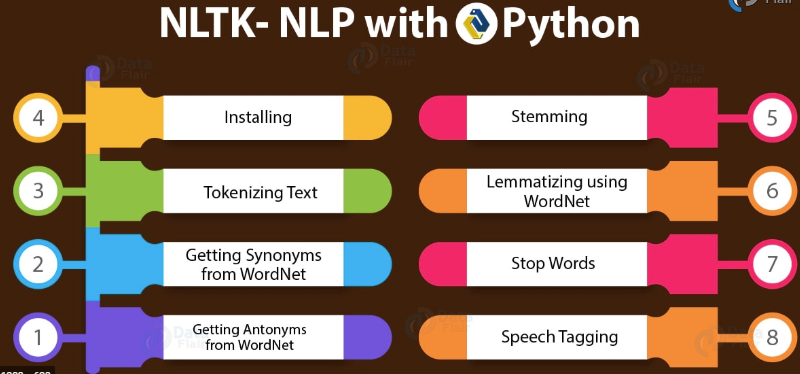

In [3]:
from IPython.display import Image, display
display(Image(filename='nltk.PNG', embed=True))

In [11]:
#Installing the NLTK
!pip install nltk

In [6]:
#Downloading the required packages with in NLTK
#If the packages were already downloaded, you can see the below message that "Package is already up-to-date"
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('popular', quiet=True) 
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\YVKCH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YVKCH\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Image of our original text file
#This text file contains some of the ML and Statistics terms and definitions
#For simplicity, I have entered only 15-20 terms to test the bot

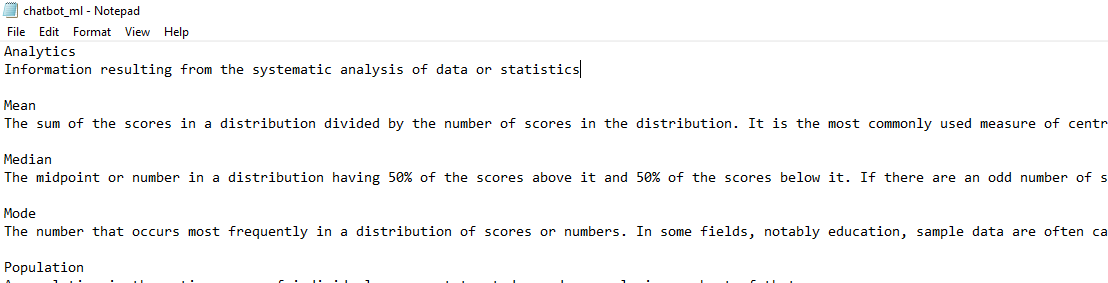

In [4]:
from IPython.display import Image, display
display(Image(filename='chatbot_ml.PNG', embed=True))

In [7]:
#Reading the complete text file 
file=open('chatbot_ml.txt','r',errors = 'ignore')
raw=file.read()
raw = raw.lower()# converts to lowercase

In [8]:
#Reading the complete text file into list of words and sentences
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences 
word_tokens = nltk.word_tokenize(raw)# converts to list of words

In [9]:
#LemTokens is used to convert all the input tokens and return normalized tokens
#WordNet is basically an English dictionary that is embedded into NLTK package
lemmer = nltk.stem.WordNetLemmatizer()

def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

In [10]:
#This step include the code that creates interactive chatbot
#Step 1: Defining Introduction welcome messages and the reaction of the BOT for the intro message from the user

INTRO_WELCOME = ("howdy","Whazzup","hola","hello", "hi", "greetings", "what's up","hey",)
INTRO_OUTPUT = ["hola","hi", "hey", "hi there", "hello", "I am glad! You are talking to me"]

def greeting(sentence):
 
    for word in sentence.split():
        if word.lower() in INTRO_WELCOME:
            return random.choice(INTRO_OUTPUT)
        
#Function- If the user response is not a greeting message, BOT will find the definition of the term 
#If if cannot find the term, a message was included "Could you please repeat?"
def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]
    if(req_tfidf==0):
        robo_response=robo_response+"I am sorry! I don't understand you.Could you please repeat?"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

#Step 2: Code which takes input from user and performs the following
#a)If the user input is intro message, BOT will use Step 1 to welcome the user
#b)If the user input is any of question related to statistics terms, BOT will use function above to retrieve definition
#c)If the user input is Thank you or Bye, BOT will use the below code to sned a message to the user

flag=True
print("BOT: My name is ChatBot. I will answer your queries about Machine learning and Statistics terms. If you want to exit, type Bye!")
while(flag==True):
    user_response = input()
    user_response=user_response.lower()
    if(user_response!='bye'):
        if(user_response=='thanks' or user_response=='thank you'):
            flag=False
            print("BOT: You are welcome..")
        else:
            if(greeting(user_response)!=None):
                print("BOT: "+greeting(user_response))
            else:
                print("BOT: ",end="")
                print(response(user_response))
                sent_tokens.remove(user_response)
    else:
        flag=False
        print("BOT: Bye! take care..")

BOT: My name is ChatBot. I will answer your queries about Machine learning and Statistics terms. If you want to exit, type Bye!
hi
BOT: hello
hola
BOT: hi
hey
BOT: hi there
what is median
BOT: if there are an odd number of scores, the median is the middle score.
analytics
BOT: analytics
the usage of the chatbot can be monitored in order to spot potential flaws or problems.
what is mode
BOT: mode
the number that occurs most frequently in a distribution of scores or numbers.
thanks
BOT: You are welcome..


In [ ]:
#BOT Working
#I gave the user inputs and recorded the screenshots from the sequence of BOT execution events
#Step 1: Interface at the start of execution

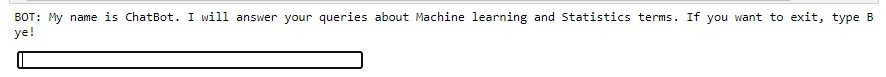

In [5]:
from IPython.display import Image, display
display(Image(filename='first_m.PNG', embed=True))

In [ ]:
#Step 2: List of BOT interaction messages with the user

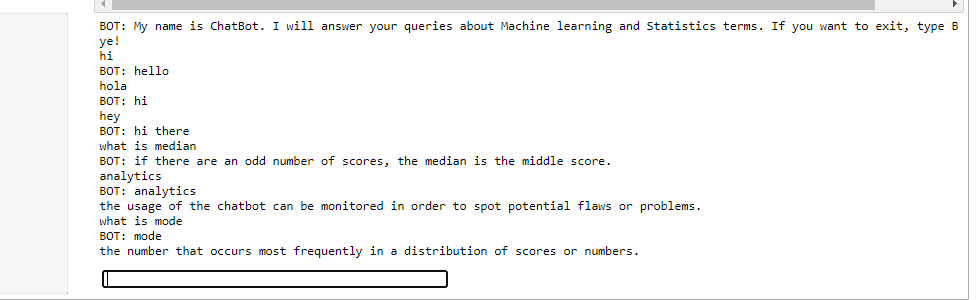

In [6]:
from IPython.display import Image, display
display(Image(filename='seq_mes.PNG', embed=True))

In [ ]:
#Step 3: BOT will end when user inputs Thank you message or Bye! where you won't find an option to enter the next input

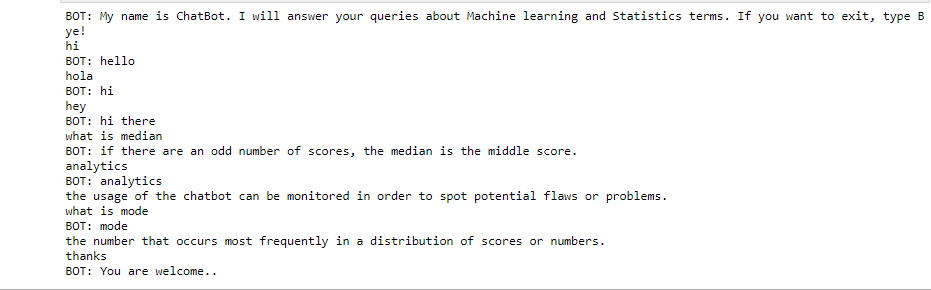

In [7]:
from IPython.display import Image, display
display(Image(filename='final_mes.PNG', embed=True))